##### Import data

In [1]:
from util_copy import load_fabric_data, extract_label_grouping, extract_label_grouping, load_fabric_images
import numpy as np
from matplotlib import image

In [2]:

path = r"C:/Users/Administrator/Desktop/PRML/Project/fabric_data/label_json/**/**.json"

fids, fdata = load_fabric_data(path)
ftype1, ftype2 = extract_label_grouping(fdata)


In [3]:
path = r"C:/Users/Administrator/Desktop/PRML/Project/fabric_data/temp/"
labels, imgs = load_fabric_images(path, fids, fdata, ftype2)


C:/Users/Administrator/Desktop/PRML/Project/fabric_data/temp/**/**.jpg


In [ ]:
#print(fdata)

In [4]:
print(len(labels))
print(imgs[0])

3371
[[[130 130 128 155 147 171]
  [139 137 138 151 150 168]
  [147 145 148 146 154 167]
  ...
  [ 57  46  24  92  87  29]
  [ 73  51  28  83  64  34]
  [124  89  69  76  47  51]]

 [[139 141 140 162 153 174]
  [143 144 146 157 155 168]
  [148 148 150 151 155 166]
  ...
  [ 69  61  38 121 124  69]
  [ 58  41  15 113 100  56]
  [ 69  39  15  88  63  33]]

 [[143 147 150 160 149 166]
  [145 149 152 156 153 162]
  [150 151 156 153 156 161]
  ...
  [102 100  75 153 160 116]
  [ 90  79  49 140 133  79]
  [ 75  55  22 126 106  47]]

 ...

 [[ 56  19  13  76  21  24]
  [ 55  16  11  77  28  31]
  [ 57  18  13  70  31  32]
  ...
  [208 213 219 210 213 206]
  [208 218 220 222 223 228]
  [200 210 211 216 213 234]]

 [[ 74  35  28 103  31  34]
  [ 69  30  23 103  37  39]
  [ 72  31  25  95  39  40]
  ...
  [191 200 209 212 212 212]
  [220 231 237 209 209 221]
  [196 210 213 213 210 237]]

 [[ 87  49  40 122  36  37]
  [ 82  42  34 123  41  43]
  [ 85  45  37 115  43  46]
  ...
  [185 193 204 214 

In [5]:
n_samples = len(imgs)
print("Number of samples:", n_samples)

Number of samples: 3371


In [6]:
print(imgs[1230].shape)

(400, 400, 6)


##### Padding
- https://blog.csdn.net/wuzqChom/article/details/74785643
- https://stackoverflow.com/questions/47697622/cnn-image-resizing-vs-padding-keeping-aspect-ratio-or-not/49882055#49882055
- https://stackoverflow.com/questions/43391205/add-padding-to-images-to-get-them-into-the-same-shape

In [7]:
import cv2

In [8]:
imgs = [cv2.resize(img,(200, 200)) for img in imgs]

##### Split data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_images, test_images, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.3, random_state=1)

In [11]:
print("#Training data: {}\n#Testing data: {}\n#Class: {}".format(len(train_images), len(test_images), len(set(train_labels))))

#Training data: 2359
#Testing data: 1012
#Class: 9


##### Normalize data

In [12]:
train_images, test_images, train_labels, test_labels = np.array(train_images), np.array(test_images), np.array(train_labels), np.array(test_labels)
train_images, test_images = train_images / 255.0, test_images / 255.0

In [13]:
train_images.shape
print(test_labels)

[0 8 3 ... 7 4 4]


NameError: name 'plt' is not defined

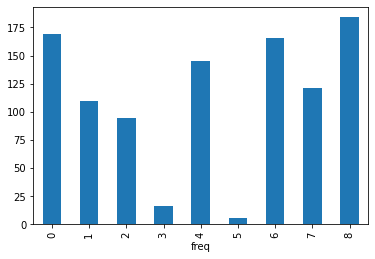

In [15]:
import pandas as pd

df = pd.DataFrame({'freq': test_labels})
df.groupby('freq', as_index=False).size().plot(kind='bar')
plt.show()

##### Generate fake data

In [16]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

##### Create model
- https://www.tensorflow.org/tutorials/images/classification

In [17]:
num_classes = 9

In [21]:
# AlexNet model
class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                        padding= 'valid', activation= 'relu',
                        input_shape= input_shape,
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None)) 

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(256, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.4))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.4))
        self.add(Dense(1000, activation= 'relu'))
        self.add(Dropout(0.4))
        self.add(Dense(num_classes, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.0001),
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                    metrics=['accuracy'])

In [22]:
model = AlexNet((200, 200, 6), num_classes)

In [23]:
model.summary()

Model: "alex_net_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 96)        69792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 384)       885120    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 384)       1327488   
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 256)       8

In [24]:
# some training parameters
EPOCHS = 10
image_height = 200
image_width = 200
train_dir = "train"
valid_dir = "validation"
model_dir = "my_model.h5"


In [25]:
# start training
model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
74/74 [==============================] - 223s 3s/step - loss: 1.9808 - accuracy: 0.2556 - val_loss: 1.7445 - val_accuracy: 0.2846
Epoch 2/10


ResourceExhaustedError:  OOM when allocating tensor with shape[6400,4096] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node gradient_tape/alex_net_1/dense_4/MatMul_1 (defined at <ipython-input-25-0eda1c78e52e>:2) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_1676]

Function call stack:
train_function


##### Reason why accuracy doesn't further increase
1. imbalance of trianing set 
2. learning rate too large 

In [ ]:
#plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
#plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)